# Training of k-NN
Since k-NN needs just to store the training data for then performing predictions, there is not any particular way of "training" the model, we just need to store somewhere our training samples (instance-based ML model).
# Evaluation for Hyperparameter Tuning
To decide which values of k and p best fit our model, we need to perform hyperparameter tuning using a validation set that is different from the training set. In this case, we have both a training and a validation set, so we will train our model using the training set, then make predictions on the validation set, varying k and p. Finally, we will choose the pair (k,p) that gives us the best accuracy on our validation set. To do this, we choose a range of k up to 3.6% of our training samples, which seems to be a reasonable range. We also try different values of p, which is used to compute the Minkowski distance.

In [1]:
import numpy as np
from knn import KNN
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read training.csv from the data folder
dtr = pd.read_csv('../Data/training.csv')
dtev = pd.read_csv('../Data/validation.csv')

DTR = dtr.values
DTEV = dtev.values
accuracies = []
for k in range(1, 100):
    knn_classifier = KNN(k)
    knn_classifier.train(DTR[:, :-1], DTR[:, -1])
    for p in range (1, 4):
        predictions = knn_classifier.predict(DTEV[:, :-1], p)
        accuracy = np.mean(predictions[:, 0] == DTEV[:, -1])
        # print("k:", k, "p:", p, "accuracy:", accuracy)
        accuracies.append([k, p, accuracy])

print(max(accuracies, key=lambda x: x[2]))

[27, 2, 0.825]


As we can see, the best accuracy (82.5%) is obtained with k=27 and p=2, thus we will choose these as hyperparameters for our model.

# Explaining curse of dimensionality in KNN
K-NN is strongly affected by the _curse of dimensionality_, since as dimensionality of data grows, data becomes increasingly sparse, leading to the loss of the concept of local neighborhoods. We now explain this phenomenon using the following example:
Assuming we have a D-dimensional hypercube (our sample space) with all sides of length 1 we sample the training data uniformly from this hypercube.
Now we want to analyze the edge length $l$ of the smallest hypercube that contains all k-nearest neighbors of a test point, with respect to 	$D$(feature dimensionality), $k$, $N$(number of training samples).
- Since the data is uniformly distributed in our hypercube (with volume $V_{tot}=1$), we can approximate the volume of the smallest hypercube that contains a neighborhood as $V_{fraction}=\frac{k}{N}V_{tot}=\frac{k}{N}$
- We can now recover $l$ from the volume as $\( \left( \frac{k}{N} \right) \)^{\frac{1}{D}}$

We now plot $l$ as a function of $D$, varying $k$ and fixing $N=1000$, in order to see how the dimensionality growth affects the edge length of the hypercube containing the neighborhood.

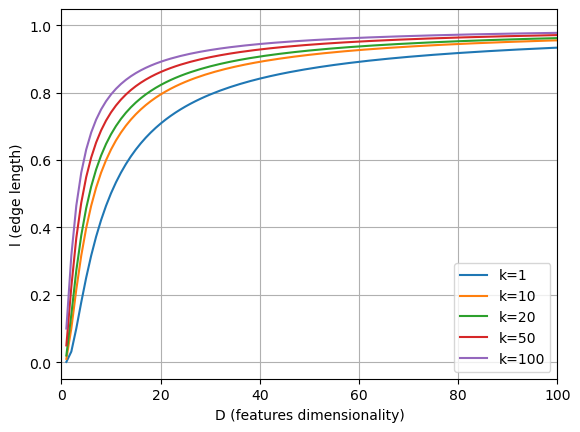

In [3]:
D = np.array([i for i in range (1, 1000)])
N = 1000
# Plot l as a function of (k/N)^(1/D)
plt.figure()
plt.xlabel("D (features dimensionality)")
plt.ylabel("l (edge length)")
for k in [1, 10, 20, 50, 100]:
    plt.plot(D, (k/N)**(1/D), label="k="+str(k))
plt.grid()
plt.legend()
plt.xlim(0, 100)
plt.show()

For example, we can see that with $k=10$ (so we use a local neighborhood that is 1% of our data), in order to obtain locality (with a rather small dimensionality of the features, $D=20$), we have to cover the 80% of the range of each input variable. We can see that our data becomes sparse, so our neighborhoods are no longer "local", and the performance of k-nn decreases dramatically. 